# Make figures

To run this notebook, the GWP notebook must first be run (for the base case)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))
plt.rcParams['figure.dpi'] = 300

default_size = 18
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=default_size)    # legend fontsize
plt.rc('figure', titlesize=default_size)

color_h2 = 'lightblue'
color_ch4 = 'lightseagreen'
color_h2o = 'darkviolet'
color_o3 = 'gold'
color_aerosol='brown'


#model_dict = { 'OSLOCTM3':'OsloCTM',
#               'WACCM6-2deg':'WACCM',
#               'INCA':'INCA',
#               'GFDL-emi':'GFDL-emi',
#               'GFDL_nudge':'GFDL',
#               'UKCA':'UKCA',
#               'OSLOCTM3-emi':'OsloCTM-emi'}

#sorted_array = ['GFDL','INCA','OsloCTM','UKCA','WACCM','GFDL-emi','OsloCTM-emi']

#Plot the harmonized soil sink value or not. 
#star = False

#For the RF per flux figures, use the same y-axis. 
ylim_rf_fig = 0.7

In [37]:
filepath= r"./output/"
#df_drydep_max_table_per_flux = pd.read_csv(filepath+'drydep_90_table_per_flux_h2.csv',index_col=0)
#df_drydep_max_table_per_flux.rename(model_dict, inplace=True)
#df_drydep_min_table_per_flux = pd.read_csv(filepath+'drydep_50_table_per_flux_h2.csv',index_col=0)
#df_drydep_min_table_per_flux.rename(model_dict, inplace=True)
df_table_per_flux = pd.read_csv(filepath+'table_per_flux_h2_combined.csv',index_col=0)


#df_feedback_factor = pd.read_csv(filepath+'feedback_factor_ch4.csv',index_col=0,header=None)


#Making modellist with shorter names
#df_feedback_factor.rename(model_dict, inplace=True)

#df_table_per_flux.rename(model_dict, inplace=True)
#df_table_per_flux = df_table_per_flux.sort_index()
#df_table_per_flux=df_table_per_flux.reindex(sorted_array)
#modellist = df_table_per_flux.index
df_table_per_flux

,deltaH2,surf_h2_per_h2_flux,surf_ch4_per_h2_flux,ch4_flux_per_h2_flux,ch4_rf_per_h2_flux,ozone_rf_per_h2_flux,h2o_rf_per_h2_flux,aerosol_rf_per_h2_flux
CNTR,0.00,nan,nan,nan,nan,nan,nan,nan
SSP119,9.79,6.36,1.12,0.30,0.43,0.49,0.25,nan
SSP434,9.77,6.52,1.27,0.30,0.49,0.43,0.28,nan
SSP585,9.77,6.42,1.34,0.32,0.51,0.45,0.28,nan
antro01,0.10,6.27,1.11,0.30,0.43,0.44,0.23,nan
antro1,0.99,6.27,1.12,0.31,0.43,0.47,0.23,nan
antro10,9.90,6.28,1.12,0.31,0.43,0.47,0.23,nan
antro100,99.1,6.35,1.06,0.29,0.41,0.45,0.23,nan
epia,0.99,6.05,1.01,0.28,0.39,0.41,0.19,nan
maud,0.99,9.24,1.29,0.35,0.50,0.53,0.25,nan


df_drydep_mean_table_per_flux = pd.read_csv(filepath+'drydep_59_table_per_flux_h2_combined.csv',index_col=0)
df_drydep_mean_table_per_flux.rename(model_dict, inplace=True)
df_drydep_mean_table_per_flux=df_drydep_mean_table_per_flux.reindex(sorted_array)
df_drydep_mean_table_per_flux

## Surface H2 concentration by 1 Tg H2/yr

In [3]:
tittel = 'Surface H$_2$ per H$_2$ flux'
ytittel ='[ppb H$_2$(Tg H$_2$ yr$^{-1}$)$^{-1}$]'
field = 'surf_h2_per_h2_flux'
legend = False #False

In [4]:
plot_values = df_table_per_flux[field]
##plot_values_max_dry = df_drydep_max_table_per_flux[field]
##plot_values_min_dry = df_drydep_min_table_per_flux[field]
#plot_values_mean_dry = df_drydep_mean_table_per_flux[field]
plot_values = plot_values.drop('CNTR')
plot_values

SSP119     6.36
SSP434     6.52
SSP585     6.42
antro01    6.27
antro1     6.27
antro10    6.28
antro100   6.35
epia       6.05
maud       9.24
maxdep     5.48
munich     6.32
nemo       7.92
usdrydep   5.20
zep        6.69
Name: surf_h2_per_h2_flux, dtype: float64

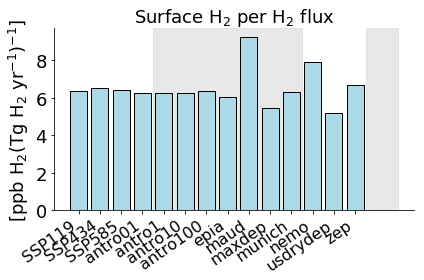

In [5]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):

    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_h2,label=model)
#for m,model in enumerate(plot_values.drop(['GFDL-emi','OsloCTM-emi']).index): 
#    if star: plt.plot(m,plot_values_mean_dry.loc[model],marker='*',markersize=12,color='gray')
    
    #plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    #plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    #plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.axvspan(3.5, 10.5, alpha=0.5, color='lightgray',zorder=-10)
ax.axvspan(13.5, 15, alpha=0.5, color='lightgray',zorder=-10)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
#plt.tick_params(labelbottom = False, bottom = False)
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(plot_values.index, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/Surface_H2_per_H2_flux.png', transparent=True)

## Methane flux by 1 Tg H2/yr

In [6]:
tittel = 'Methane flux per H$_2$ flux'
ytittel ='[Tg CH$_4$ (Tg H$_2$)$^{-1}$]'
field = 'ch4_flux_per_h2_flux'
legend = False #False

In [7]:
plot_values = df_table_per_flux[field]
plot_values = plot_values.drop('CNTR')
#plot_values_mean_dry = df_drydep_mean_table_per_flux[field]
#plot_values_max_dry = df_drydep_max_table_per_flux[field]
#plot_values_min_dry = df_drydep_min_table_per_flux[field]

In [8]:
#df_feedback_factor
#feedback_factor = df_feedback_factor[1]
#feedback_frac = 1.0 - (1.0/feedback_factor)
#feedback_frac

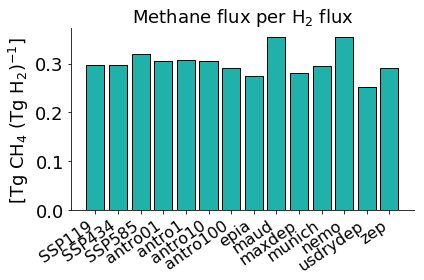

In [9]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_ch4,label=model)
#for m,model in enumerate(plot_values.drop(['GFDL-emi','OsloCTM-emi']).index): 
#    if star: plt.plot(m,plot_values_mean_dry.loc[model],marker='*',markersize=12,color='gray')
    #plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    #plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    #plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    #Hatch the feedback factor part
    #plt.bar(m,plot_values.loc[model]*feedback_frac[model],bottom=plot_values.loc[model]*(1.0-feedback_frac[model]),fill=False,edgecolor='black',hatch='/')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(plot_values.index, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/CH4_flux_per_H2_flux.png', transparent=True)

## Methane ERF per flux

In [10]:
tittel = 'Methane ERF per H$_2$ flux'
ytittel ='[mW m$^{-2}$(Tg H$_2$ yr$^{-1}$)$^{-1}$]'
field = 'ch4_rf_per_h2_flux'
legend = False


In [11]:
plot_values = df_table_per_flux[field]
plot_values = plot_values.drop('CNTR')
#plot_values_mean_dry = df_drydep_mean_table_per_flux[field]
#plot_values_max_dry = df_drydep_max_table_per_flux[field]
#plot_values_min_dry = df_drydep_min_table_per_flux[field]

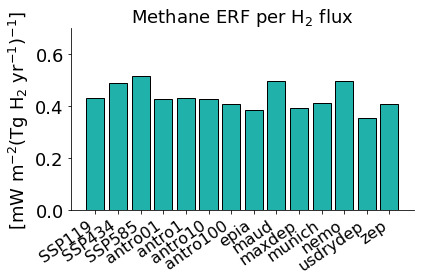

In [12]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):

    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_ch4,label=model)
#for m,model in enumerate(plot_values.drop(['GFDL-emi','OsloCTM-emi']).index): 
#    if star: plt.plot(m,plot_values_mean_dry.loc[model],marker='*',markersize=12,color='gray')
    #plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],linewidth=0.8,color='k')
    #plt.plot(m,plot_values_max_dry.loc[model],fillstyle='none',markersize=8,marker='^',color='black')
    #plt.plot(m,plot_values_min_dry.loc[model],fillstyle='none',markersize=8,marker='v',color='black')
   
    
    #Hatch the feedback factor part
    #plt.bar(m,plot_values.loc[model]*feedback_frac[model],bottom=plot_values.loc[model]*(1.0-feedback_frac[model]),fill=False,edgecolor='black',hatch='/')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)

plt.ylim(top=ylim_rf_fig)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(plot_values.index, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/CH4_RF_per_H2_flux.png', transparent=True)

## Tropospheric ozone by H2 flux

tittel = 'Tropospheric ozone per H$_2$ flux'
ytittel ='[DU (Tg H$_2$ yr$^{-1}$)$^{-1}$]'
field = 'trop_du_ozone_per_h2_flux'
legend = False

For the following figures, add the methane induced effect

In [13]:
#Indirect effect via Methane.
#df_drydep_max_table_per_flux_ch4 = pd.read_csv(filepath+'drydep_90_table_per_flux_ch4.csv',index_col=0)
#df_drydep_max_table_per_flux_ch4.rename(model_dict, inplace=True)
#df_drydep_min_table_per_flux_ch4 = pd.read_csv(filepath+'drydep_50_table_per_flux_ch4.csv',index_col=0)
#df_drydep_min_table_per_flux_ch4.rename(model_dict, inplace=True)
#df_table_per_flux_ch4 = pd.read_csv(filepath+'table_per_flux_ch4.csv',index_col=0)
#df_table_per_flux_ch4.rename(model_dict, inplace=True)

In [14]:
#field_ch4 = field.replace('h2_','ch4_')
#print(field)
#print(field_ch4)

#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_mean_dry = df_drydep_mean_table_per_flux[field]
#plot_values_max_dry = df_drydep_max_table_per_flux[field]
#plot_values_min_dry = df_drydep_min_table_per_flux[field]
#plot_values
#print(plot_values_max_dry)
#print(plot_values_min_dry)

In [15]:
#Indirect effect:
#plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
#plot_values_max_dry_ch4 = df_drydep_max_table_per_flux_ch4[field_ch4]*df_drydep_max_table_per_flux['ch4_flux_per_h2_flux']
#plot_values_min_dry_ch4 = df_drydep_min_table_per_flux_ch4[field_ch4]*df_drydep_min_table_per_flux['ch4_flux_per_h2_flux']


In [16]:
#Add GFDL numbers:
#inputpath = r"./input/"
#file = 'ozone_du_trop.txt'
#df_ozone_du_trop = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#df_ozone_du_trop.index.name = None
#df_ozone_du_trop.rename(columns=model_dict, inplace=True)

##This should be tropospheric ozone [DU] Divide by flux H2 directly
#plot_values_ch4['GFDL-emi'] = (df_ozone_du_trop['GFDL-emi'].loc['10CH4'])/df_table_per_flux['deltaH2'].loc['GFDL-emi']
#plot_values_max_dry_ch4['GFDL-emi'] = (df_ozone_du_trop['GFDL-emi'].loc['10CH4'])/df_drydep_max_table_per_flux['deltaH2'].loc['GFDL-emi']
#plot_values_min_dry_ch4['GFDL-emi'] = (df_ozone_du_trop['GFDL-emi'].loc['10CH4'])/df_drydep_min_table_per_flux['deltaH2'].loc['GFDL-emi']


#df_ozone_du_trop
#plot_values_ch4['GFDL-emi']

plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_o3,label=model)
for m,model in enumerate(plot_values.drop(['GFDL-emi','OsloCTM-emi']).index): 
    if star: plt.plot(m,plot_values_mean_dry.loc[model],marker='*',markersize=12,color='gray')
    #plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_o3)
    #if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
    #    plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    #else:
    #    plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    #plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    #plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    #plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/Trop_Ozone_DU_per_H2_flux.png', transparent=True)

## Stratospheric ozone by H2 flux

tittel = 'Stratospheric ozone per H$_2$ flux'
ytittel ='[DU (Tg H$_2$ yr$^{-1}$)$^{-1}$]'
field = 'strat_du_ozone_per_h2_flux'
legend = False #False

In [17]:
#field_ch4 = field.replace('h2_','ch4_')

#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_mean_dry = df_drydep_mean_table_per_flux[field]
#plot_values_max_dry = df_drydep_max_table_per_flux[field]
#plot_values_min_dry = df_drydep_min_table_per_flux[field]

In [18]:
#Indirect effect:
#plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
#plot_values_max_dry_ch4 = df_drydep_max_table_per_flux_ch4[field_ch4]*df_drydep_max_table_per_flux['ch4_flux_per_h2_flux']
#plot_values_min_dry_ch4 = df_drydep_min_table_per_flux_ch4[field_ch4]*df_drydep_min_table_per_flux['ch4_flux_per_h2_flux']


In [19]:
#Add GFDL numbers:
#inputpath = r"./input/"
#file = 'ozone_du_strat.txt'
#df_ozone_du_strat = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#df_ozone_du_strat.index.name = None
#df_ozone_du_strat.rename(columns=model_dict, inplace=True)
##Divide by flux H2 directly
#plot_values_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
#plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_drydep_max_table_per_flux['deltaH2'].loc['GFDL-emi']
#plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_drydep_min_table_per_flux['deltaH2'].loc['GFDL-emi']



plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_o3,label=model)
for m,model in enumerate(plot_values.drop(['GFDL-emi','OsloCTM-emi']).index): 
    if star: plt.plot(m,plot_values_mean_dry.loc[model],marker='*',markersize=12,color='gray')
    #plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_o3)
    #if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
    #    plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    #else:
    #    plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    #plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    #plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    #plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/Strat_Ozone_DU_per_H2_flux.png', transparent=True)
modellist

## Ozone ERF by 1 Tg H2

In [20]:
tittel = 'Ozone ERF per H$_2$ flux'
ytittel ='[mW m$^{-2}$(Tg H$_2$ yr$^{-1}$)$^{-1}$]'
field = 'ozone_rf_per_h2_flux'
legend = False #False

In [21]:
field_ch4 = field.replace('h2_','ch4_')

In [22]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values = plot_values.drop('CNTR')
#plot_values_mean_dry = df_drydep_mean_table_per_flux[field]
#plot_values_max_dry = df_drydep_max_table_per_flux[field]
#plot_values_min_dry = df_drydep_min_table_per_flux[field]

In [23]:
#Indirect effect:
#plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
#plot_values_max_dry_ch4 = df_drydep_max_table_per_flux_ch4[field_ch4]*df_drydep_max_table_per_flux['ch4_flux_per_h2_flux']
#plot_values_min_dry_ch4 = df_drydep_min_table_per_flux_ch4[field_ch4]*df_drydep_min_table_per_flux['ch4_flux_per_h2_flux']

In [24]:
#Add GFDL numbers:
#inputpath = r"./input/"
#file = 'ozone_rf.txt'
#df_ozone_rf = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#df_ozone_rf.index.name = None
#df_ozone_rf.rename(columns=model_dict, inplace=True)
#Divide by h2 flux directly
#plot_values_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
#plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_drydep_max_table_per_flux['deltaH2'].loc['GFDL-emi']
#plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_drydep_min_table_per_flux['deltaH2'].loc['GFDL-emi']



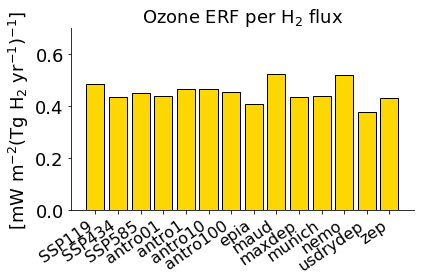

In [25]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):  
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_o3,label=model)    
#for m,model in enumerate(plot_values.drop(['GFDL-emi','OsloCTM-emi']).index): 
#    if star: plt.plot(m,plot_values_mean_dry.loc[model],marker='*',markersize=12,color='gray')
    #plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_o3)
    #if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
    #    plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    #else:
    #    plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    #plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    #plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    #plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
plt.ylim(top=ylim_rf_fig)

if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(plot_values.index, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/Ozone_RF_per_H2_flux.png', transparent=True)

## Strat. H2O ERF by 1 Tg H2

In [26]:
tittel = 'Stratospheric H$_2$O ERF per H$_2$ flux'
ytittel ='[mW m$^{-2}$ (Tg H$_2$ yr$^{-1}$)$^{-1}$]'
field = 'h2o_rf_per_h2_flux'
legend = False

In [27]:
#field_ch4 = field.replace('h2_','ch4_')

In [28]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values = plot_values.drop('CNTR')
#plot_values_mean_dry = df_drydep_mean_table_per_flux[field]
#plot_values_max_dry = df_drydep_max_table_per_flux[field]
#plot_values_min_dry = df_drydep_min_table_per_flux[field]

In [29]:
#Indirect effect:
#plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
#plot_values_max_dry_ch4 = df_drydep_max_table_per_flux_ch4[field_ch4]*df_drydep_max_table_per_flux['ch4_flux_per_h2_flux']
#plot_values_min_dry_ch4 = df_drydep_min_table_per_flux_ch4[field_ch4]*df_drydep_min_table_per_flux['ch4_flux_per_h2_flux']

In [30]:
#Add GFDL numbers:
#inputpath = r"./input/"
#file = 'H2O_rf_gfdl.txt'
#df_h2o_rf = pd.read_csv(inputpath+file, sep=',',index_col=0,header=0)

#gfdl_emi_ch4 = df_h2o_rf.loc['H2+CH4 [mW m-2]'] - df_h2o_rf.loc['H2 [mW m-2]']

##gfdl_emi_ch4
#plot_values_ch4['GFDL-emi'] = gfdl_emi_ch4/df_table_per_flux['deltaH2'].loc['GFDL-emi']
#plot_values_max_dry_ch4['GFDL-emi'] = gfdl_emi_ch4/df_drydep_max_table_per_flux['deltaH2'].loc['GFDL-emi']
#plot_values_min_dry_ch4['GFDL-emi'] = gfdl_emi_ch4/df_drydep_min_table_per_flux['deltaH2'].loc['GFDL-emi']


In [31]:
#modellist
#exchange_dict={'UKCA':''}
#modellist_strath2o=pd.Index(modellist.to_series().replace(exchange_dict))
#modellist_strath2o

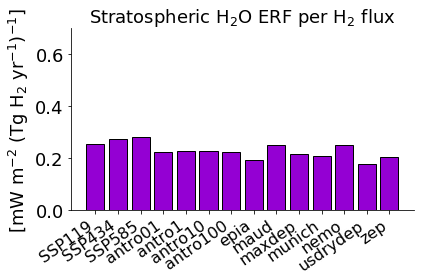

In [32]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_h2o,label=model)
#for m,model in enumerate(plot_values.drop(['GFDL-emi','OsloCTM-emi']).index): 
#    if star: plt.plot(m,plot_values_mean_dry.loc[model],marker='*',markersize=12,color='gray')
    #plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_h2o)
    #if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
    #    plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    #else:
    #    plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    #plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    #plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    #plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
plt.ylim(top=ylim_rf_fig)



if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(plot_values.index, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/Strat_H2O_RF_per_H2_flux.png', transparent=True)

## Aerosol RF by 1 Tg H2

tittel = 'Aerosol RF per H$_2$ flux'
ytittel ='[mW m$^{-2}$ (Tg H$_2$ yr$^{-1}$)$^{-1}$]'
field = 'aerosol_rf_per_h2_flux'
legend = False

In [33]:
#field_ch4 = field.replace('h2_','ch4_')

#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_mean_dry = df_drydep_mean_table_per_flux[field]
#plot_values_max_dry = df_drydep_max_table_per_flux[field]
#plot_values_min_dry = df_drydep_min_table_per_flux[field]
plot_values

In [34]:
#Indirect effect:
#plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
#plot_values_max_dry_ch4 = df_drydep_max_table_per_flux_ch4[field_ch4]*df_drydep_max_table_per_flux['ch4_flux_per_h2_flux']
#plot_values_min_dry_ch4 = df_drydep_min_table_per_flux_ch4[field_ch4]*df_drydep_min_table_per_flux['ch4_flux_per_h2_flux']

In [35]:
#GFDL: The nubers used include the methane induced effect. Set this value to zero and not nan.
#Add GFDL numbers:
#inputpath = r"./input/"
#file = 'aerosol_rf.txt'
#df_aerosol_rf = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#df_aerosol_rf.index.name = None
#df_aerosol_rf.rename(columns=model_dict, inplace=True)

#plot_values['GFDL-emi']=df_aerosol_rf.loc['10CH4']['GFDL-emi']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
#plot_values_max_dry['GFDL-emi']=df_aerosol_rf.loc['10CH4']['GFDL-emi']/df_drydep_max_table_per_flux['deltaH2'].loc['GFDL-emi']
#plot_values_min_dry['GFDL-emi']=df_aerosol_rf.loc['10CH4']['GFDL-emi']/df_drydep_min_table_per_flux['deltaH2'].loc['GFDL-emi']

#plot_values_ch4['GFDL-emi']=0.0
#plot_values_max_dry_ch4['GFDL-emi']=0.0
#plot_values_min_dry_ch4['GFDL-emi']=0.0

modellist
exchange_dict={'UKCA':'','WACCM':' '}
modellist_aerosols=pd.Index(modellist.to_series().replace(exchange_dict))
modellist_aerosols

plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_aerosol,label=model)
for m,model in enumerate(plot_values.drop(['GFDL-emi','OsloCTM-emi']).index): 
    if star: plt.plot(m,plot_values_mean_dry.loc[model],marker='*',markersize=12,color='gray')
    #plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_aerosol)
  
    #plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    #plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    #plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    #plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
plt.ylim(top=ylim_rf_fig)

if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist_aerosols, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/aerosol_RF_per_H2_flux.png', transparent=True)